In [ ]:
"""
Plan (20min)

Plotting different CP2 scans

Plotting derived products (including RHI)
"""

CP2 radar collected ran various scanning strageties during its operations which were dependent on the research requirements.

This scans include:
1. volumes (what we get from operational radars)
2. vertical cross sections (RHI's)
3. bird bath scans (for calibration)
4. sector scans

The radar had two antenna systems. An X-band antenna that collected some polarimetric measurements and an S band antenna that collected full polarimetric measurements. Given the scattering and attenuation of radiation by precipitation is dependent on the frequency, the dual frequency systems provides an additonal perspective to polarimetric measurements for investigation.

The CP2 dataset also includes derived measurement, which include classification.
All level 1 CP2 files use the Radial MDV format (NCAR), which is described [here](https://www.eol.ucar.edu/system/files/MDV_format_ICD.pdf)

For this tutorial we'll look at the different scanning strageties, bands and derived measurements



In [23]:
import warnings
warnings.simplefilter("ignore")

vol_sband_url = 'https://dapds00.nci.org.au/thredds/fileServer/hj10/cp2/level_1/s_band/sur/2014/20141127/cp2-s_20141127_064104.sur.mdv'
vol_xband_url = 'https://dapds00.nci.org.au/thredds/fileServer/hj10/cp2/level_1/x_band/sur/2014/20141127/cp2-x_20141127_064104.sur.mdv'
vol_derived_url = 'https://dapds00.nci.org.au/thredds/fileServer/hj10/cp2/level_1/derived/sur/2014/20141127/cp2-derived_20141127_064104.sur.mdv'

rhi_sband_url = ''
rhi_xband_url = ''
rhi_derived_url = ''


In [12]:
import urllib

vol_sband_ffn = '/tmp/cp2-s_20141127_064104.sur.mdv'
urllib.request.urlretrieve(vol_sband_url, vol_sband_ffn)
vol_xband_ffn = '/tmp/cp2-x_20141127_064104.sur.mdv'
urllib.request.urlretrieve(vol_xband_url, vol_xband_ffn)
vol_derived_ffn = '/tmp/cp2-derived_20141127_064104.sur.mdv'
urllib.request.urlretrieve(vol_derived_url, vol_derived_ffn)

print('All files downloaded')

/home/meso/miniconda3/envs/radar-dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


('/tmp/cp2-derived_20141127_064104.sur.mdv',
 <http.client.HTTPMessage at 0x7f9915f68a90>)

In [17]:
import pyart

vol_sband = pyart.io.read_mdv(vol_sband_ffn, file_field_names=True)
print('S band fields:', vol_sband.fields.keys())

vol_xband = pyart.io.read_mdv(vol_xband_ffn, file_field_names=True)
print('X band fields:', vol_xband.fields.keys())

vol_derived = pyart.io.read_mdv(vol_derived_ffn, file_field_names=True)
print('Derived fields:', vol_derived.fields.keys())

/home/meso/miniconda3/envs/radar-dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


S band fields: dict_keys(['CMD_FLAG', 'VEL', 'ZDR_F', 'SPECTRAL_SNR', 'PHIDP_F', 'DBMHC', 'DBZ_F', 'CLUT_2_WX_RATIO', 'WIDTH_F', 'DBMHC_F', 'PHIDP', 'CPA', 'CMD', 'WIDTH', 'ZDRM_F', 'RHOHV_F', 'CLUT', 'ZDRM', 'VEL_F', 'ZDR', 'DBMVC_F', 'SNR_F', 'NCP', 'KDP_F', 'KDP', 'DBMVC', 'RHOHV', 'DBZ', 'SNR'])
X band fields: dict_keys(['LDRH', 'DBZ', 'SNR', 'LDRV', 'DBM'])
Derived fields: dict_keys(['RATE_KDP_ZDR', 'TEMP_FOR_PID', 'PID2', 'KDP', 'PID', 'ZDR_FOR_PID', 'RATE_ZH', 'RATE_KDP', 'RATE_HYBRID', 'PidInterest2', 'RATE_Z_ZDR', 'PidInterest'])


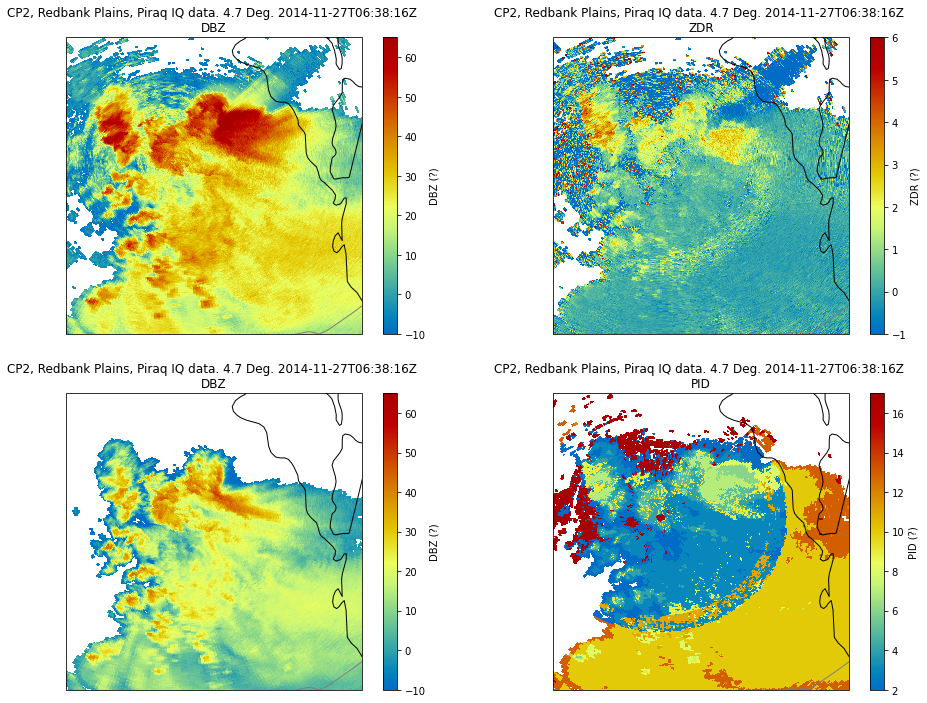

In [43]:
#Wow, that's a lot of fields.
#The fields ending in F may contain additional filtering.

from matplotlib import pyplot as plt #plotting toolkit
import cartopy.crs as ccrs

fig = plt.figure(figsize=(16, 12), facecolor='w')
tilt = 4

ax = plt.subplot(221, projection=ccrs.PlateCarree())
vol_sband_disp = pyart.graph.RadarMapDisplay(vol_sband)
vol_sband_disp.plot_ppi_map('DBZ', tilt,
                            cmap=pyart.graph.cm_colorblind.HomeyerRainbow,
                            min_lat=-28.25, max_lat=-27.25, min_lon=152.5, max_lon=153.5,
                            vmin=-10, vmax=65,
                            resolution='10m')

ax = plt.subplot(222, projection=ccrs.PlateCarree())
vol_sband_disp.plot_ppi_map('ZDR', tilt,
                            cmap=pyart.graph.cm_colorblind.HomeyerRainbow,
                            min_lat=-28.25, max_lat=-27.25, min_lon=152.5, max_lon=153.5,
                            vmin=-1, vmax=6,
                            resolution='10m')

ax = plt.subplot(223, projection=ccrs.PlateCarree())
vol_xband_disp = pyart.graph.RadarMapDisplay(vol_xband)
vol_xband_disp.plot_ppi_map('DBZ', tilt,
                            cmap=pyart.graph.cm_colorblind.HomeyerRainbow,
                            min_lat=-28.25, max_lat=-27.25, min_lon=152.5, max_lon=153.5,
                            vmin=-10, vmax=65,
                            resolution='10m')

ax = plt.subplot(224, projection=ccrs.PlateCarree())
vol_derived_disp = pyart.graph.RadarMapDisplay(vol_derived)
vol_derived_disp.plot_ppi_map('PID', tilt,
                            cmap=pyart.graph.cm_colorblind.HomeyerRainbow,
                            min_lat=-28.25, max_lat=-27.25, min_lon=152.5, max_lon=153.5,
                            resolution='10m')
#vol_derived.info()